1. Проведите небольшое исследование алгоритма градиентного спуска на данных из урока. Оцените влияние значений скорости обучения (`eta`) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],     
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [4]:
# Исходный код
n = X.shape[0]
eta = 1e-3
iterations = 1001
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [1.1102 0.84  ] 3173.15
100 [ 7.43515582 10.71754582] 899.5990444359252
200 [11.44993589 10.49282195] 735.5540619653672
300 [14.98921624  9.8634316 ] 606.0048772266812
400 [18.17511588  9.27626113] 500.7989288428639
500 [21.04606457  8.74617136] 415.355423398327
600 [23.63334499  8.26841272] 345.9620646005472
700 [25.96499229  7.83785632] 289.6039104863001
800 [28.06626432  7.44984037] 243.83236130353217
900 [29.95992301  7.10016181] 206.65877484533297
1000 [31.66648131  6.78503276] 176.46806566379882


Рассмотрим, как влияет увеличение количества итераций на ошибку при фиксированном значении скорости обучения, равном 1e-3:

In [5]:
iterations_list = [501, 1001, 1501, 2001, 2501, 3001, 3501, 4001, 4501, 5001, 6001, 7001, 12001, 20001]
err_list_iter = []

for iteration in iterations_list:
    n = X.shape[0]
    eta = 1e-3
    w = np.array([1, 0.5])
    
    for i in range(iteration):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        for j in range(w.shape[0]):
            w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
        if i == (iteration-1):
            print(i, w, err)
            err_list_iter.append(err)

500 [21.04606457  8.74617136] 415.355423398327
1000 [31.66648131  6.78503276] 176.46806566379882
1500 [37.97952317  5.61928129] 92.05932434403572
2000 [41.73215361  4.92632937] 62.2342399245102
2500 [43.96281128  4.51442137] 51.69580934583289
3000 [45.28877016  4.26957292] 47.97214782992787
3500 [46.07695337  4.12402886] 46.656424868950594
4000 [46.54546925  4.03751382] 46.19152576288303
4500 [46.82396684  3.98608711] 46.02725776328683
5000 [46.98951279  3.95551778] 45.96921511416331
6000 [47.14641166  3.92654521] 45.94145963171208
7000 [47.2018505  3.916308 ] 45.93799435998288
12000 [47.23197602  3.91074509] 45.937500014996345
20000 [47.23214282  3.91071429] 45.937499999999986


Построим график зависимости ошибки алгоритма от количества итераций:

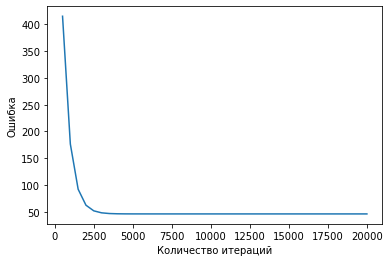

In [6]:
plt.plot(iterations_list, err_list_iter)
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка');

Полученные данные показывают, что увеличение числа итераций приводит к падению ошибки. На начальном этапе (до 2500 итераций) увеличение итераций приводит к существенному падению ошибки: ошибка падает с 415.35 при 500 итераций до 51.69 при 2500 итераций, т.е. более, чем в 8 раз. Затем (после 2500 итераций) происходит  очень медленное изменение ошибки:  ошибка уменьшается с 51.59 при 2500 итераций до 45.937 при 20000 итераций (т.е. падает в 1.12 раз). Достижение ошибки, соотвтствующей полученной методом наименьших квадратов, происходит при 20000 итераций. 

Рассмотрим, как влияет изменение параметра eta на ошибку при фиксированном количестве итераций, равном 1000:

In [7]:
eta_list = [0.08, 0.07, 0.06, 0.05, 0.02, 0.01, 5e-3, 1e-3, 1e-4]
err_list_eta = []

for item in eta_list:
    n = X.shape[0]
    eta = item
    iterations = 1001
    w = np.array([1, 0.5])
    
    for i in range(iterations):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        for j in range(w.shape[0]):
            w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
        if i == (iterations-1):
            print(i, w, err, eta)
            err_list_eta.append(err)

1000 [3.67512105e+150 1.99023493e+151] 3.094588442436394e+303 0.08
1000 [1.48983537e+46 8.06809452e+46] 8.220757855742908e+94 0.07
1000 [47.23214286  3.91071429] 45.937500000000014 0.06
1000 [47.23214286  3.91071429] 45.9375 0.05
1000 [47.23214282  3.91071429] 45.937499999999986 0.02
1000 [47.23088237  3.91094704] 45.937500872219864 0.01
1000 [46.99313195  3.95484948] 45.96853390140358 0.005
1000 [31.66648131  6.78503276] 176.46806566379882 0.001
1000 [ 7.38906894 10.68706909] 900.0794345405571 0.0001


Построим график зависимости ошибки алгоритма от параметра eta:

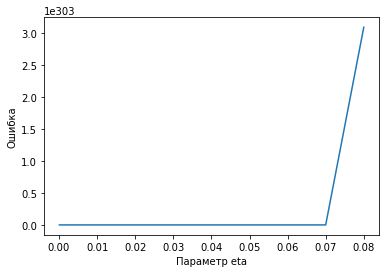

In [8]:
plt.plot(eta_list, err_list_eta)
plt.xlabel('Параметр eta')
plt.ylabel('Ошибка');

Для большей наглядности построим начальный участок этой зависимости, соответствующий изменению параметра eta от 1e-4 до 0.06:  

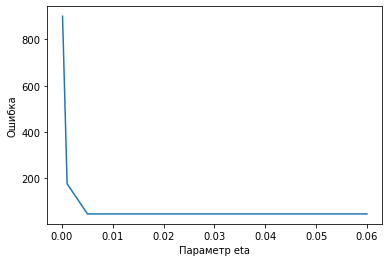

In [9]:
plt.plot(eta_list[2:], err_list_eta[2:])
plt.xlabel('Параметр eta')
plt.ylabel('Ошибка');

Полученные данные показывают, что при параметре eta, равном 0.02, полученная ошибка совпадает с ошибкой в результате МНК. Увеличение параметра eta до 0.08 приводит к стремлению ошибки к бесконечности. Это связано с тем, что слишком большой шаг алгоритма может вызывать ситуацию, при которой он "перепрыгивает" через минимум или расходится. Слишком маленький шаг, как например 1e-3 или 1e-4, приводит к более медленной сходимости алгоритма и за заданное количество итераций алгоритм не успевает сойтись.

Таким образом, увеличение скорости обучения позволяет снизить число итераций для получения решения с заданной ошибкой. Однако слишком большие значения скорости обучения могут привести к росту ошибки и расхождению алгоритма. Увеличение числа итераций для малых значений параметра eta может позволить снизить ошибку. Однако очень маленькие скорости обучения потребуют значительного количества итераций для получения необходимой ошибки. 

Совпадение результатов работы алгоритма грдиентного спуска с результатами МНК можно получить при количестве итераций, равном 1090 и параметре eta, равном 0.022 

In [10]:
n = X.shape[0]
eta = 0.022
iterations = 1091
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i == iterations-1:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

1090 [47.23214286  3.91071429] 45.937499999999986


Процесс вычисления весов можно ускорить, например, путем применения методики переменного размера шага, при которой на начальном этапе берется большой шаг, уменьшающийся с увеличением количества итераций.

In [50]:
n = X.shape[0]
eta = 0.06
iterations = 500
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        eta = 0.85*eta
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986
print(i, w, err)

0 [ 7.612 20.9  ] 3173.15
100 [47.05426317  3.94356113] 45.95646935612194
200 [47.23037651  3.91104046] 45.93750183944908
300 [47.23210734  3.91072084] 45.937500000733316
400 [47.23214156  3.91071453] 45.93750000000095
499 [47.23214278  3.9107143 ] 45.93749999999999


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [51]:
w = np.array([1, 0.5])
n = X.shape[0]
eta = 1e-3
iterations = 1001

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    w -= (eta * (1/n * 2 * np.sum(X.T * (y_pred - y)))) # ошибка!
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [1.4502 0.9502] 3173.15
100 [11.6740207 11.1740207] 737.5884748924025
200 [11.82000082 11.32000082] 737.0919281764903
300 [11.82208519 11.32208519] 737.0918269437198
400 [11.82211495 11.32211495] 737.0918269230813
500 [11.82211538 11.32211538] 737.0918269230768
600 [11.82211538 11.32211538] 737.0918269230768
700 [11.82211538 11.32211538] 737.091826923077
800 [11.82211538 11.32211538] 737.0918269230768
900 [11.82211538 11.32211538] 737.0918269230768
1000 [11.82211538 11.32211538] 737.0918269230768


Исправленный код выглядит следующим образом:

In [52]:
w = np.array([1, 0.5])
n = X.shape[0]
eta = 1e-3
iterations = 1001

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    w -= (eta * (1/n * 2 * np.dot(X.T,(y_pred - y)))) 
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [1.1102 0.84  ] 3173.15
100 [ 7.43515582 10.71754582] 899.5990444359252
200 [11.44993589 10.49282195] 735.5540619653672
300 [14.98921624  9.8634316 ] 606.0048772266812
400 [18.17511588  9.27626113] 500.7989288428639
500 [21.04606457  8.74617136] 415.355423398327
600 [23.63334499  8.26841272] 345.9620646005472
700 [25.96499229  7.83785632] 289.6039104863001
800 [28.06626432  7.44984037] 243.83236130353217
900 [29.95992301  7.10016181] 206.65877484533297
1000 [31.66648131  6.78503276] 176.46806566379882


*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. 

Сколько нужно сделать итераций, если установить допустимое отклонение mse за одну итерацию в размере diff=1e-6, а значение eta=1e-2?

In [117]:
w = np.array([1, 0.5])
diff = 1e-6
eta = 1e-2
n = X.shape[0]

# зададим начальную разницу ошибок большим числом
error_diff = np.inf

# счетчик итераций
iter_num = 0

err=0

while error_diff > diff:
    y_pred = np.dot(X, w)
    w -= (eta * (1/n * 2 * np.dot(X.T,(y_pred - y))))
    
    y_pred_new = np.dot(X, w)
    new_error = calc_mse(y, y_pred_new)
    
    error_diff = abs(new_error - err)
    
    iter_num += 1
    err = new_error
  
print(f'Количество итераций составляет: {iter_num}')

Количество итераций составляет: 809
